In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd 

# EDA

## Loading the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

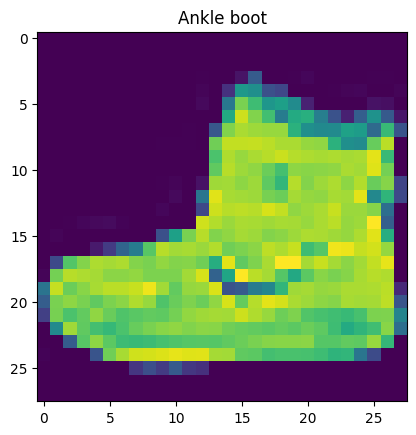

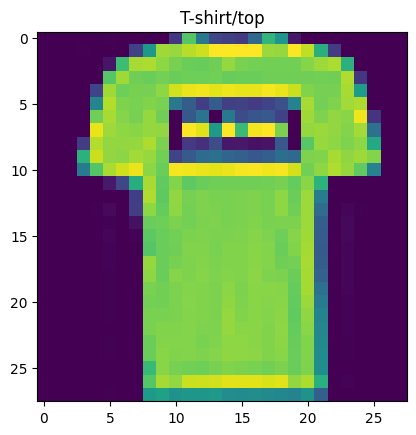

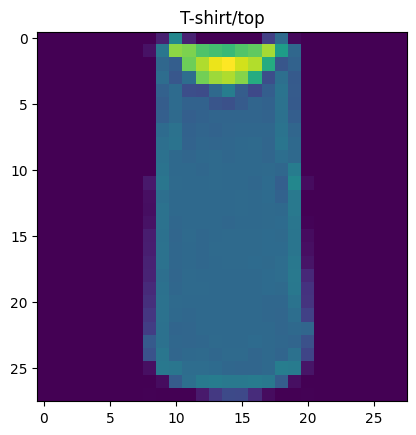

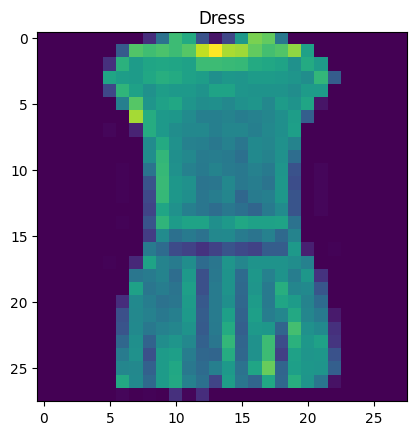

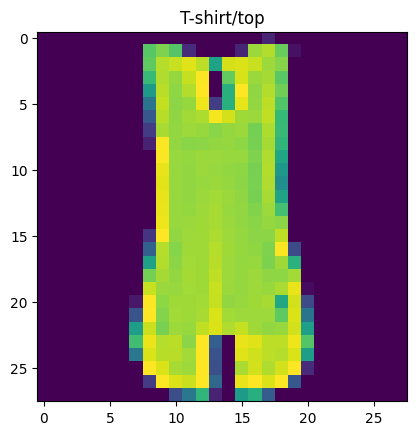

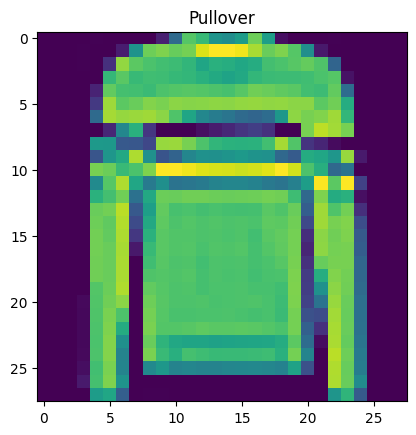

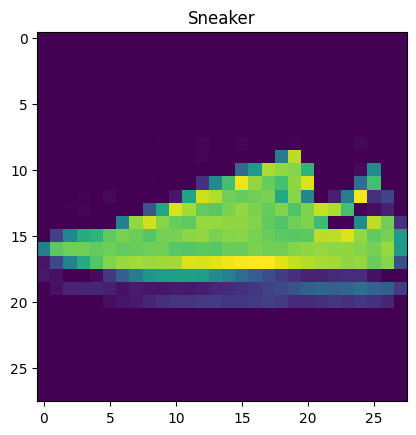

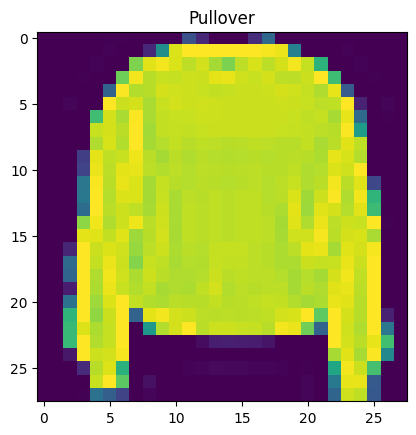

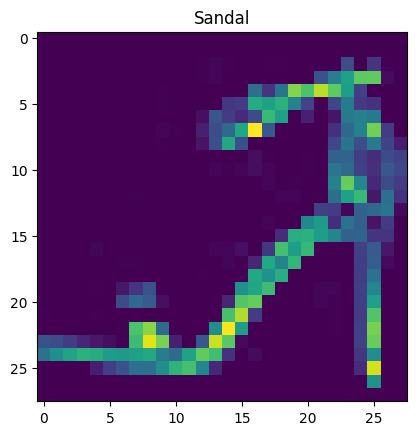

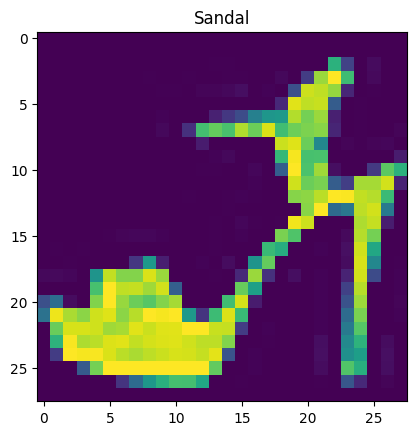

In [13]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.colormaps()
    plt.show()

## Normaising the images

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

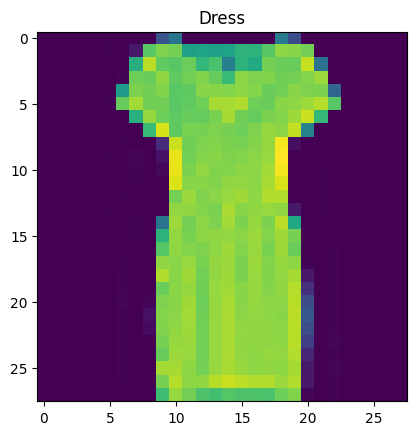

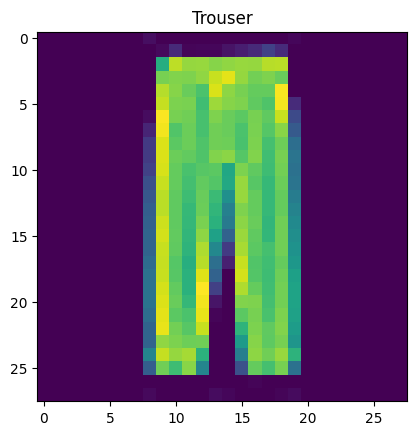

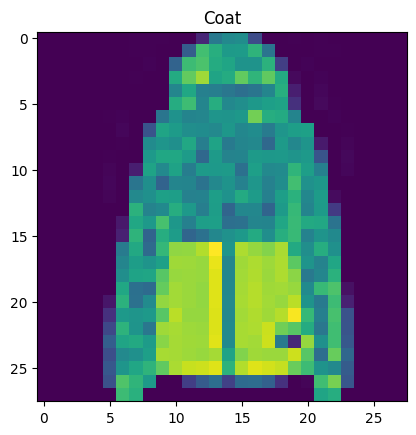

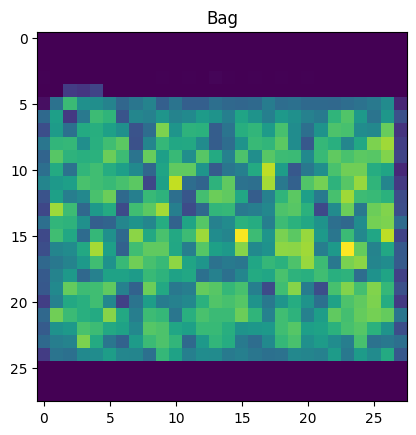

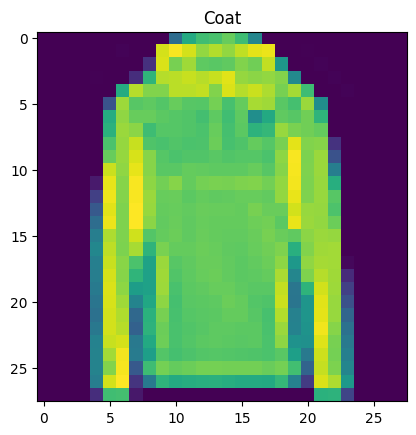

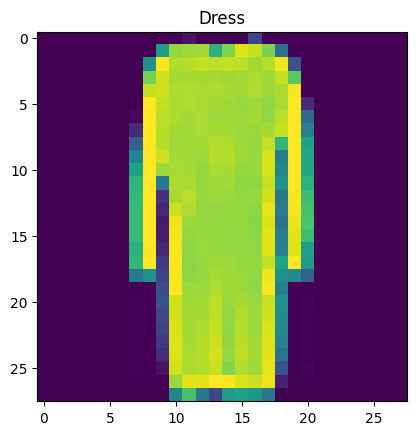

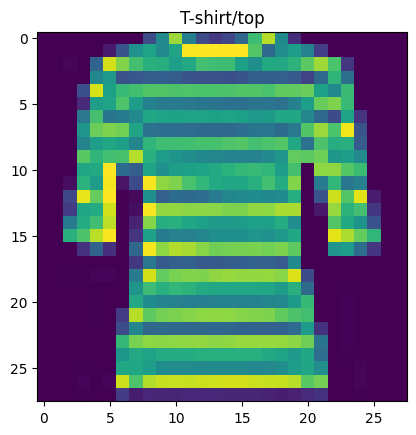

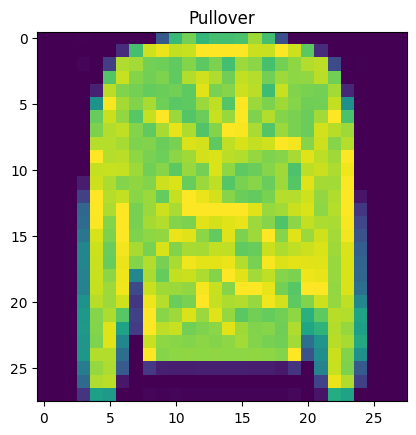

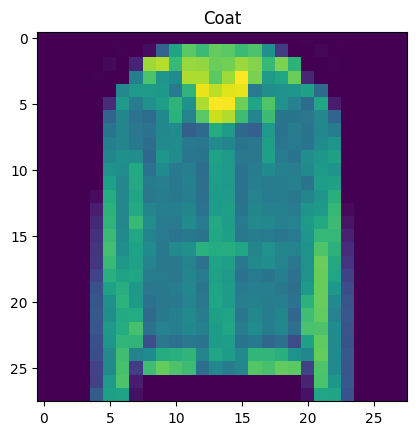

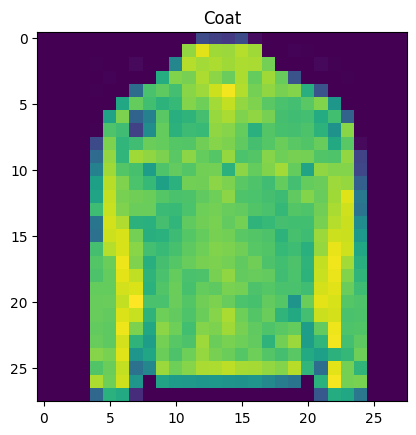

In [16]:
for i in range(20,30):
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.colormaps()
    plt.show()

# Model

In [70]:
model = tf.keras.Sequential([
    keras.layers.InputLayer(input_shape=(28,28)),
    keras.layers.Flatten(), 
    keras.layers.Dense(64,activation= "relu"),
    keras.layers.Dense(128,activation= "relu"),
    keras.layers.Dense(64,activation= "relu"),
    keras.layers.Dense(len(class_names) , activation="softmax")
])

In [71]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 10)                650       
                                                                 
Total params: 67466 (263.54 KB)
Trainable params: 67466 (263.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [73]:
hist = model.fit(train_images,train_labels,epochs=16,batch_size = 16,validation_split=0.3)

Epoch 1/16


/home/subhradip/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2625/2625 [==============================] - 6s 2ms/step - loss: 0.5295 - accuracy: 0.8076 - val_loss: 0.4271 - val_accuracy: 0.8465
Epoch 2/16
2625/2625 [==============================] - 5s 2ms/step - loss: 0.3917 - accuracy: 0.8580 - val_loss: 0.3866 - val_accuracy: 0.8601
Epoch 3/16
2625/2625 [==============================] - 5s 2ms/step - loss: 0.3560 - accuracy: 0.8673 - val_loss: 0.3577 - val_accuracy: 0.8692
Epoch 4/16
2625/2625 [==============================] - 5s 2ms/step - loss: 0.3318 - accuracy: 0.8769 - val_loss: 0.3751 - val_accuracy: 0.8673
Epoch 5/16
2625/2625 [==============================] - 5s 2ms/step - loss: 0.3099 - accuracy: 0.8841 - val_loss: 0.3356 - val_accuracy: 0.8783
Epoch 6/16
2625/2625 [==============================] - 5s 2ms/step - loss: 0.2956 - accuracy: 0.8889 - val_loss: 0.3560 - val_accuracy: 0.8755
Epoch 7/16
2625/2625 [==============================] - 5s 2ms/step - loss: 0.2839 - accuracy: 0.8938 - val_loss: 0.3640 - val_accuracy: 0.8697
Epo

In [74]:
hist_df = pd.DataFrame(hist.history)

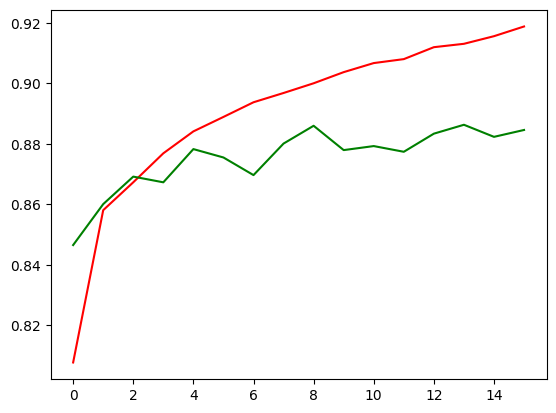

In [75]:
plt.plot(hist_df["accuracy"],color = "r")
plt.plot(hist_df["val_accuracy"],color = "g")
plt.show()

# Model Prediction

In [81]:
y_pred = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [87]:
data = []
for i in y_pred:
    data.append(np.argmax(i))

In [84]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [88]:
data

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 9,
 1,
 2,
 6,
 0,
 9,
 6,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 6,
 2,
 5,
 0,
 2,
 2,
 8,
 6,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 6,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 0,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 2,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 6,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 3,
 0,
 7,
 7,
 6,
 2,
 7,
 6,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 6,
 6,
 2,
 2,
 2,


In [93]:
model.save("fashion_detector.h")

INFO:tensorflow:Assets written to: fashion_detector.h/assets


INFO:tensorflow:Assets written to: fashion_detector.h/assets
